In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [43]:
nrj_FRANCE = pd.read_csv(r'data/fr.csv', sep=',', header=0)

In [44]:
# Create dictionnary for months
month_dict = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'Spetember',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}

In [45]:
nrj_FRANCE.head(10)

,start,end,load
0,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+00:00,70929.0
1,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+00:00,69773.0
2,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+00:00,66417.0
3,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+00:00,64182.0
4,2015-01-01 04:00:00+00:00,2015-01-01 05:00:00+00:00,63859.0
5,2015-01-01 05:00:00+00:00,2015-01-01 06:00:00+00:00,63921.0
6,2015-01-01 06:00:00+00:00,2015-01-01 07:00:00+00:00,64117.0
7,2015-01-01 07:00:00+00:00,2015-01-01 08:00:00+00:00,63861.0
8,2015-01-01 08:00:00+00:00,2015-01-01 09:00:00+00:00,64277.0
9,2015-01-01 09:00:00+00:00,2015-01-01 10:00:00+00:00,65100.0


In [46]:
nrj_FRANCE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48870 entries, 0 to 48869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start   48870 non-null  object 
 1   end     48870 non-null  object 
 2   load    48870 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [47]:
for i in ['start', 'end']:
    nrj_FRANCE[i] = pd.to_datetime(nrj_FRANCE[i])
print(nrj_FRANCE.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48870 entries, 0 to 48869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   start   48870 non-null  datetime64[ns, UTC]
 1   end     48870 non-null  datetime64[ns, UTC]
 2   load    48870 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(1)
memory usage: 1.1 MB
None


In [48]:
nrj_FRANCE['Duration'] = nrj_FRANCE['end']-nrj_FRANCE['start']
print(nrj_FRANCE['Duration'].mean(), nrj_FRANCE['Duration'].median())
# All are equal to 1 hour

0 days 01:00:00 0 days 01:00:00


In [49]:
# Sum over months 
# Define Month and Year depending on the Start time

nrj_FRANCE['day'] = pd.DatetimeIndex(nrj_FRANCE['start']).day
nrj_FRANCE['month'] = pd.DatetimeIndex(nrj_FRANCE['start']).month
nrj_FRANCE['year'] = pd.DatetimeIndex(nrj_FRANCE['start']).year

display(nrj_FRANCE.head(10))

,start,end,load,Duration,day,month,year
0,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+00:00,70929.0,0 days 01:00:00,1,1,2015
1,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+00:00,69773.0,0 days 01:00:00,1,1,2015
2,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+00:00,66417.0,0 days 01:00:00,1,1,2015
3,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+00:00,64182.0,0 days 01:00:00,1,1,2015
4,2015-01-01 04:00:00+00:00,2015-01-01 05:00:00+00:00,63859.0,0 days 01:00:00,1,1,2015
5,2015-01-01 05:00:00+00:00,2015-01-01 06:00:00+00:00,63921.0,0 days 01:00:00,1,1,2015
6,2015-01-01 06:00:00+00:00,2015-01-01 07:00:00+00:00,64117.0,0 days 01:00:00,1,1,2015
7,2015-01-01 07:00:00+00:00,2015-01-01 08:00:00+00:00,63861.0,0 days 01:00:00,1,1,2015
8,2015-01-01 08:00:00+00:00,2015-01-01 09:00:00+00:00,64277.0,0 days 01:00:00,1,1,2015
9,2015-01-01 09:00:00+00:00,2015-01-01 10:00:00+00:00,65100.0,0 days 01:00:00,1,1,2015


In [53]:
nrj_FRANCE_month = pd.DataFrame(nrj_FRANCE[['year', 'month', 'load']].groupby(['year', 'month']).sum())

nrj_FRANCE_month = nrj_FRANCE_month.reset_index()
nrj_FRANCE_month = nrj_FRANCE_month.replace({"month": month_dict})
display(nrj_FRANCE_month.head(10))

nrj_FRANCE_month = nrj_FRANCE_month.pivot(index = 'month', columns = 'year', values='load')

display(nrj_FRANCE_month)

display(nrj_FRANCE_month.index)

,year,month,load
0,2015,January,51725199.0
1,2015,February,47963647.0
2,2015,March,45104582.0
3,2015,April,36438366.0
4,2015,May,33590317.0
5,2015,June,32969829.0
6,2015,July,34666370.0
7,2015,August,31381232.0
8,2015,Spetember,33014999.0
9,2015,October,38840503.0


year,2015,2016,2017,2018,2019,2020
month,,,,,,
April,36438366.0,38564314.0,36411014.0,35674724.0,37497012.0,30534897.0
August,31381232.0,31951701.0,31969347.0,31802033.0,31315448.0,NaN
December,44003196.0,50279941.0,50670179.0,46491366.0,46106977.0,NaN
February,47963647.0,45557783.0,42500793.0,49402028.0,43540349.0,42367373.0
January,51725199.0,49215126.0,56972849.0,47677046.0,53309882.0,48982627.0
July,34666370.0,33527240.0,33773638.0,34317609.0,34146521.0,32828106.0
June,32969829.0,32453840.0,33325754.0,32029026.0,32350412.0,30360224.0
March,45104582.0,46617335.0,42033655.0,47545979.0,42455425.0,40941968.0
May,33590317.0,34253383.0,34670087.0,33486745.0,35252223.0,30464502.0


Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'Spetember'],
      dtype='object', name='month')

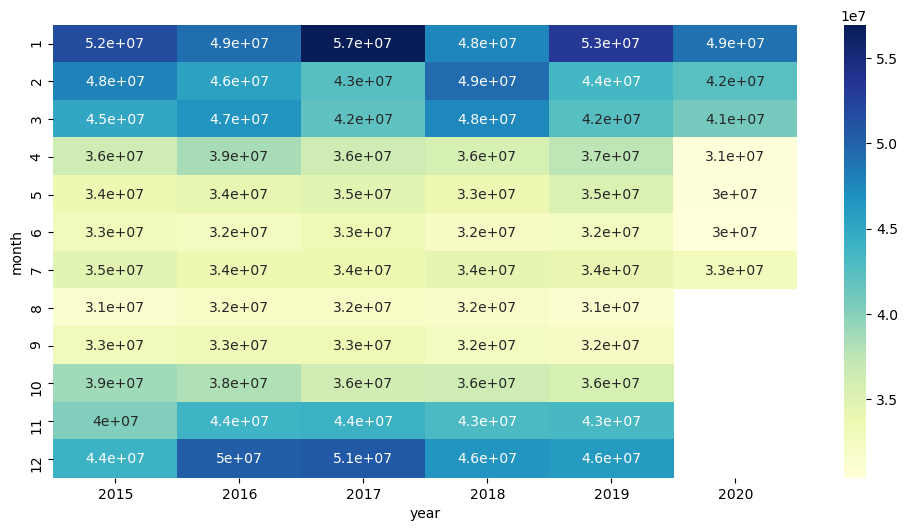

In [77]:
plt.figure(figsize=(12, 6), dpi=100)

sns.heatmap(nrj_FRANCE_month, annot=True, cmap="YlGnBu") # Inverse colors!

plt.show()

In [84]:
# Comparision for years 2020, 2019 and 2018

nrj_FRANCE_2020 = nrj_FRANCE[nrj_FRANCE['year']==2020]
nrj_FRANCE_2019 = nrj_FRANCE[nrj_FRANCE['year']==2019]
nrj_FRANCE_2018 = nrj_FRANCE[nrj_FRANCE['year']==2018]

In [85]:
nrj_FRANCE_2020_day = pd.DataFrame(nrj_FRANCE_2020[['load', 'month', 'day']].groupby(['month', 'day']).sum())
nrj_FRANCE_2020_day = nrj_FRANCE_2020_day.reset_index()
display(nrj_FRANCE_2020_day)

nrj_FRANCE_2019_day = pd.DataFrame(nrj_FRANCE_2019[['load', 'month', 'day']].groupby(['month', 'day']).sum())
nrj_FRANCE_2019_day = nrj_FRANCE_2019_day.reset_index()

nrj_FRANCE_2018_day = pd.DataFrame(nrj_FRANCE_2018[['load', 'month', 'day']].groupby(['month', 'day']).sum())
nrj_FRANCE_2018_day = nrj_FRANCE_2018_day.reset_index()

,month,day,load
0,1,1,1441716.0
1,1,2,1546926.0
2,1,3,1500839.0
3,1,4,1445840.0
4,1,5,1444781.0
...,...,...,...
208,7,27,1087608.0
209,7,28,1101361.0
210,7,29,1116157.0
211,7,30,1127456.0


In [86]:
nrj_FRANCE_2020_day = nrj_FRANCE_2020_day.pivot(index = 'month', columns = 'day', values='load')
nrj_FRANCE_2019_day = nrj_FRANCE_2019_day.pivot(index = 'month', columns = 'day', values='load')
nrj_FRANCE_2018_day = nrj_FRANCE_2018_day.pivot(index = 'month', columns = 'day', values='load')

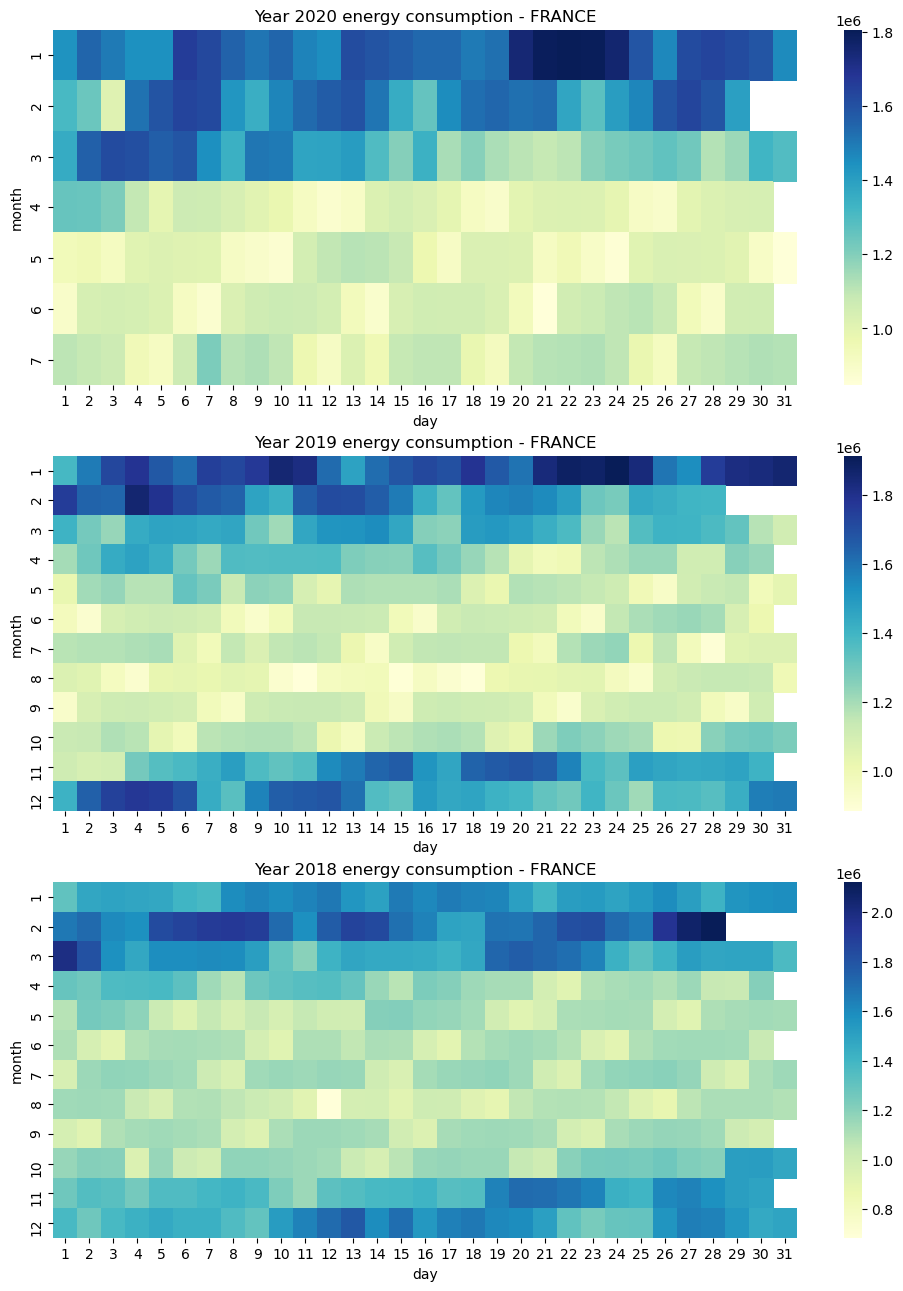

In [89]:
plt.figure(figsize=(12, 16), dpi=100)

plt.subplot(311)
sns.heatmap(nrj_FRANCE_2020_day, cmap="YlGnBu")
plt.title('Year 2020 energy consumption - FRANCE')

plt.subplot(312)
sns.heatmap(nrj_FRANCE_2019_day, cmap="YlGnBu")
plt.title("Year 2019 energy consumption - FRANCE")

plt.subplot(313)
sns.heatmap(nrj_FRANCE_2018_day, cmap="YlGnBu")
plt.title("Year 2018 energy consumption - FRANCE")

plt.show()

In [59]:
# Month energy consumption tendance
nrj_FRANCE_mth = pd.DataFrame(nrj_FRANCE[['year', 'month', 'load']].groupby(['year', 'month']).sum()).reset_index()
display(nrj_FRANCE_mth)

,year,month,load
0,2015,1,51725199.0
1,2015,2,47963647.0
2,2015,3,45104582.0
3,2015,4,36438366.0
4,2015,5,33590317.0
...,...,...,...
62,2020,3,40941968.0
63,2020,4,30534897.0
64,2020,5,30464502.0
65,2020,6,30360224.0


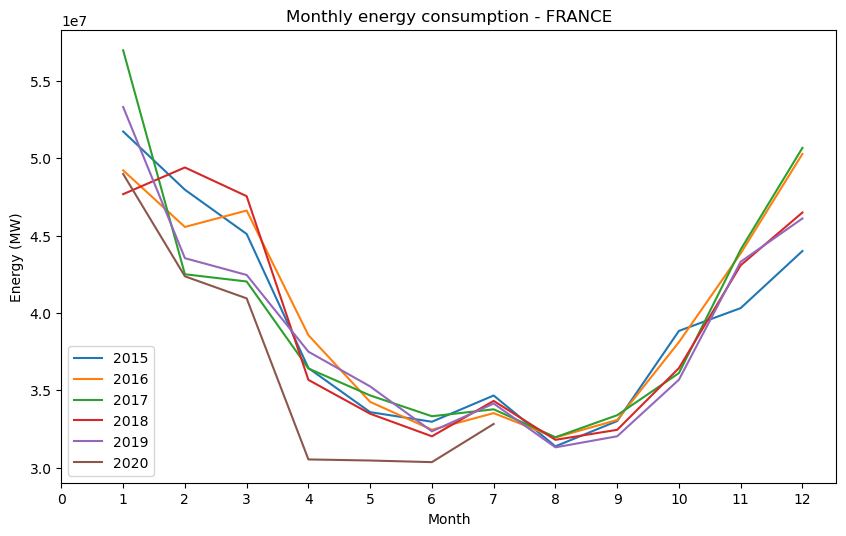

In [60]:
years = [2015, 2016, 2017, 2018, 2019, 2020]

plt.figure(figsize=(10, 6), dpi=100)
for y in years:
    data_plt = nrj_FRANCE_mth[nrj_FRANCE_mth['year']==y]
    plt.plot(data_plt['month'], data_plt['load'], label=str(y))

plt.title("Monthly energy consumption - FRANCE")
plt.xticks(range(13))
plt.xlabel("Month")
plt.ylabel("Energy (MW)")

plt.legend()
plt.show()

In [65]:
# Daily energy consumption tendance (sum over months for each year)

def get_week_day(x):
    return x.strftime('%a')

nrj_FRANCE['week_day'] = nrj_FRANCE['start'].apply(lambda x : get_week_day(x))

display(nrj_FRANCE.sample(10))

,start,end,load,Duration,day,month,year,week_day
25401,2017-11-25 11:00:00+00:00,2017-11-25 12:00:00+00:00,60908.0,0 days 01:00:00,25,11,2017,Sat
42216,2019-10-28 07:00:00+00:00,2019-10-28 08:00:00+00:00,55442.0,0 days 01:00:00,28,10,2019,Mon
25423,2017-11-26 09:00:00+00:00,2017-11-26 10:00:00+00:00,60648.0,0 days 01:00:00,26,11,2017,Sun
44803,2020-02-13 09:00:00+00:00,2020-02-13 10:00:00+00:00,72513.0,0 days 01:00:00,13,2,2020,Thu
22392,2017-07-22 22:00:00+00:00,2017-07-22 23:00:00+00:00,41795.0,0 days 01:00:00,22,7,2017,Sat
25008,2017-11-09 01:00:00+00:00,2017-11-09 02:00:00+00:00,57139.0,0 days 01:00:00,9,11,2017,Thu
29454,2018-05-13 10:00:00+00:00,2018-05-13 11:00:00+00:00,46934.0,0 days 01:00:00,13,5,2018,Sun
36120,2019-02-15 20:00:00+00:00,2019-02-15 21:00:00+00:00,63300.0,0 days 01:00:00,15,2,2019,Fri
15263,2016-09-28 04:00:00+00:00,2016-09-28 05:00:00+00:00,44110.0,0 days 01:00:00,28,9,2016,Wed
16940,2016-12-07 03:00:00+00:00,2016-12-07 04:00:00+00:00,60668.0,0 days 01:00:00,7,12,2016,Wed


In [69]:
nrj_FRANCE_day = pd.DataFrame(nrj_FRANCE[['load', 'year', 'week_day']].groupby(['year', 'week_day']).sum()).reset_index()
nrj_FRANCE_day = nrj_FRANCE_day[nrj_FRANCE_day['year']!=2020] # Remove 2020 since incomplete year (not relevant)

days=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']
mapping = {day: i for i, day in enumerate(days)}
key = nrj_FRANCE_day['week_day'].map(mapping)

nrj_FRANCE_day = nrj_FRANCE_day.iloc[key.argsort()]
display(nrj_FRANCE_day)

,year,week_day,load
1,2015,Mon,68300501.0
29,2019,Mon,67828256.0
22,2018,Mon,69614799.0
15,2017,Mon,68360580.0
8,2016,Mon,68744371.0
26,2018,Tue,69826163.0
33,2019,Tue,70727697.0
5,2015,Tue,69563292.0
12,2016,Tue,70564551.0
19,2017,Tue,70806463.0


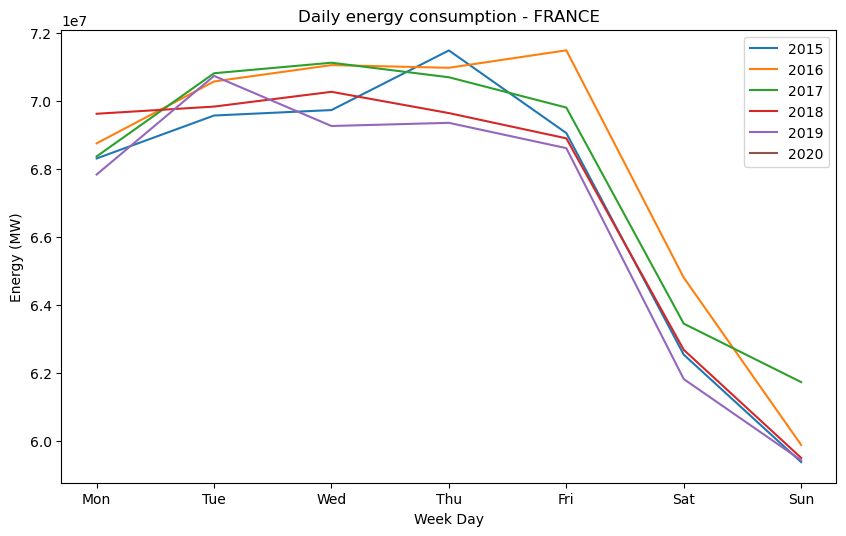

In [70]:
plt.figure(figsize=(10, 6), dpi=100)
for y in years:
    data_plt = nrj_FRANCE_day[nrj_FRANCE_day['year']==y]
    plt.plot(data_plt['week_day'], data_plt['load'], label=str(y))

plt.title("Daily energy consumption - FRANCE")
plt.xlabel("Week Day")
plt.ylabel("Energy (MW)")

plt.legend()
plt.show()

# Re-order weekday!!

In [ ]:
# Compare MARCH centered on Monday - Tuesday ... for all years
